In [1]:
libraries<-c("DESeq2","ggplot2","viridis","RColorBrewer","pheatmap","edgeR","ggfortify","factoextra")
suppressPackageStartupMessages(lapply(libraries, require, character.only = TRUE))

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

In [2]:
countData <- read.csv("/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lmajor/analysis/04_featureCounts/Lmajor_counts_cleaned.txt",
                      sep = '\t',row.names=1)

In [3]:
countData

,Chr,Start,End,Strand,Length,SRR1460763,SRR1460764,SRR1460765,SRR1460766,SRR1460767,⋯,SRR1460773,SRR1460774,SRR1460775,SRR2136702,SRR2136703,SRR2136708,SRR2136720,SRR2136721,SRR2136722,SRR2171252
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ncRNA00001,LmjF.01,3027,3059,+,33,504,652,904,465,504,⋯,548,590,517,559,272,196,177,445,358,445
ncRNA00002,LmjF.01,3248,3301,+,54,393,479,816,432,497,⋯,528,525,464,514,276,245,256,268,386,268
ncRNA00003,LmjF.01,3248,3301,-,54,393,479,816,432,497,⋯,528,525,464,514,276,245,256,268,386,268
ncRNA00004,LmjF.01,3429,3453,+,25,223,314,522,262,370,⋯,320,313,313,362,162,112,174,223,199,223
ncRNA00005,LmjF.01,3429,3453,-,25,223,314,522,262,370,⋯,320,313,313,362,162,112,174,223,199,223
LmjF.01.0010:mRNA,LmjF.01,3704,4702,-,999,1768,1952,3663,1983,2774,⋯,2597,3058,2734,3183,1353,1124,1238,1749,2093,1749
LmjF.01.0020:mRNA,LmjF.01,5790,7439,-,1650,2346,1478,2030,895,864,⋯,1274,1003,1005,1732,1522,1458,2070,2314,2667,2314
ncRNA00006,LmjF.01,7601,7621,+,21,132,86,111,55,57,⋯,131,64,58,83,117,123,106,101,165,101
LmjF.01.0030:mRNA,LmjF.01,9061,11067,-,2007,3204,2185,1897,1130,646,⋯,2016,2020,1277,1802,2011,2161,2940,3362,3121,3362


In [4]:
samples <- read.delim("/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lmajor/analysis/05_DEG/metadata_woFicoll.txt",
                      header=T)

In [5]:
countData[,1:5] <- NULL

In [6]:
#elimina las columnas que vengan de Ficoll 
countData <- countData[ , -which(names(countData) %in% c("SRR1460765","SRR1460767","SRR1460769",
                                                         "SRR1460771","SRR1460772","SRR1460775",
                                                         "SRR2136702","SRR1460764", "SRR1460774"))]

In [7]:
groups<-samples$class

In [8]:
as.factor(samples$class)

[1] Procyclic_promastigote  Procyclic_promastigote  Procyclic_promastigote 
 [4] Procyclic_promastigote  Procyclic_promastigote  Metacyclic_promastigote
 [7] Metacyclic_promastigote Metacyclic_promastigote Metacyclic_promastigote
[10] Metacyclic_promastigote Metacyclic_promastigote
Levels: Metacyclic_promastigote Procyclic_promastigote

In [9]:
d <- DGEList(counts=countData,group=factor(groups))

In [10]:
# Filter lowly expressed genes
keep <- filterByExpr(d,group = groups,min.prop = 0.5, min.count = 10, min.total.count = 15, large.n = 5)
d <- d[keep, , keep.lib.sizes=FALSE]

In [11]:
d$counts

,SRR1460763,SRR1460766,SRR1460768,SRR1460770,SRR1460773,SRR2136703,SRR2136708,SRR2136720,SRR2136721,SRR2136722,SRR2171252
ncRNA00001,504,465,412,398,548,272,196,177,445,358,445
ncRNA00002,393,432,395,273,528,276,245,256,268,386,268
ncRNA00003,393,432,395,273,528,276,245,256,268,386,268
ncRNA00004,223,262,254,267,320,162,112,174,223,199,223
ncRNA00005,223,262,254,267,320,162,112,174,223,199,223
LmjF.01.0010:mRNA,1768,1983,2052,1936,2597,1353,1124,1238,1749,2093,1749
LmjF.01.0020:mRNA,2346,895,1539,2186,1274,1522,1458,2070,2314,2667,2314
ncRNA00006,132,55,74,144,131,117,123,106,101,165,101
LmjF.01.0030:mRNA,3204,1130,1738,3673,2016,2011,2161,2940,3362,3121,3362
ncRNA00007,296,132,196,388,333,197,234,241,312,229,312


In [12]:
dim(d)
#head(d$counts)
d.full <- d # keep the old one in case we mess up
#head(d$counts)
dim(d)
d$samples$lib.size <- colSums(d$counts)
d_cpm <- calcNormFactors(d,method = "none")
cpms<-cpm(d_cpm, log=FALSE,normalized.lib.sizes = T)
cmpl<-cpm(d_cpm,log = T,normalized.lib.sizes = T)


d_TMM <- calcNormFactors(d, method="TMM")

# Calculate the cpm with the TMM normalized library
TMM <- cpm(d_TMM, log = FALSE, normalized.lib.sizes=TRUE)
tmm_log<-log(1+TMM)

[1] 36099    11

[1] 36099    11

In [13]:
write.table(cpms,file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lmajor/analysis/05_DEG/normCounts_cpm.tsv",sep = '\t',quote = F)
write.table(cmpl,file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lmajor/analysis/05_DEG/normCounts_cpm_log.tsv",sep = '\t',quote = F)
write.table(TMM,file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lmajor/analysis/05_DEG/normCounts_tmm.tsv",sep = '\t',quote = F)
write.table(tmm_log,file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lmajor/analysis/05_DEG/normCounts_tmm_log.tsv",sep = '\t',quote = F)

In [14]:
# Normalize the data
d <- calcNormFactors(d)

In [15]:
#Create a design matrix to specify the model.
design <- model.matrix(~ 0 + groups)  # No intercept, group levels as factorscolnames(design) <- levels(groups)
colnames(design) <- levels(as.factor(groups))

In [16]:
# Estimate dispertion
y <- estimateDisp(d, design)

In [17]:
y

,SRR1460763,SRR1460766,SRR1460768,SRR1460770,SRR1460773,SRR2136703,SRR2136708,SRR2136720,SRR2136721,SRR2136722,SRR2171252
ncRNA00001,504,465,412,398,548,272,196,177,445,358,445
ncRNA00002,393,432,395,273,528,276,245,256,268,386,268
ncRNA00003,393,432,395,273,528,276,245,256,268,386,268
ncRNA00004,223,262,254,267,320,162,112,174,223,199,223
ncRNA00005,223,262,254,267,320,162,112,174,223,199,223
LmjF.01.0010:mRNA,1768,1983,2052,1936,2597,1353,1124,1238,1749,2093,1749
LmjF.01.0020:mRNA,2346,895,1539,2186,1274,1522,1458,2070,2314,2667,2314
ncRNA00006,132,55,74,144,131,117,123,106,101,165,101
LmjF.01.0030:mRNA,3204,1130,1738,3673,2016,2011,2161,2940,3362,3121,3362
ncRNA00007,296,132,196,388,333,197,234,241,312,229,312


In [18]:
# Fit the model
fit <- glmQLFit(y, design)

In [19]:
contrast2 <- makeContrasts(Metacyclic_promastigote_vs_Procyclic_promastigote  = Metacyclic_promastigote - Procyclic_promastigote, levels = design)
qlf2 <- glmQLFTest(fit, contrast = contrast2)
top2 <- topTags(qlf2, n = Inf)


In [20]:
# Save the results to a TSV file
write.table(as.data.frame(top2), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lmajor/analysis/05_DEG/METAvsPRO_EdgeR.tsv", sep = "\t", quote = FALSE, row.names = TRUE)

In [21]:
DE_list_METAvsPRO <- subset(top2$table, FDR < 0.05 & logFC>= 1 | FDR < 0.05 & logFC <= -1)

In [22]:
# Save the results to a TSV file
write.table(as.data.frame(DE_list_METAvsPRO), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lmajor/analysis/05_DEG/METAvsPRO_filtered_EdgeR.tsv", sep = "\t", quote = FALSE, row.names = TRUE)


In [23]:
dds <- DESeqDataSetFromMatrix(countData = d$counts, colData = samples, design = ~ class)
dds

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 36099 11 
metadata(1): version
assays(1): counts
rownames(36099): ncRNA00001 ncRNA00002 ... LmjF.36.6995:mRNA
  LmjF.36.7000:mRNA
rowData names(0):
colnames(11): SRR1460763 SRR1460766 ... SRR2136722 SRR2171252
colData names(2): sample class

In [24]:
dds <- dds[rowSums(counts(dds)) > 1, ]

In [25]:
dds <- DESeq(dds,parallel = TRUE)

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 30 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 30 workers



In [26]:
#make contrast Metacyclic_promastigote''Procyclic_promastigote'
res2 <- results(dds, contrast = c("class", "Metacyclic_promastigote", "Procyclic_promastigote"))

In [27]:
# Save the results to a TSV file
write.table(as.data.frame(res2), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lmajor/analysis/05_DEG/METAvsPRO_DESeq.tsv", sep = "\t", quote = FALSE, row.names = TRUE)

In [28]:
DEseq_list_METAvsPRO <- subset(res2, padj < 0.05 & log2FoldChange>= 1 | padj < 0.05 & log2FoldChange <= -1)

In [29]:
# Save the results to a TSV file

write.table(as.data.frame(DEseq_list_METAvsPRO), file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lmajor/analysis/05_DEG/METAvsPRO_filtered_DESeq.tsv", sep = "\t", quote = FALSE, row.names = TRUE)

In [30]:
normcounts<-as.data.frame(counts(dds,normalized =TRUE))

In [31]:
write.table(normcounts,file = "/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lmajor/analysis/05_DEG/normCounts_DESeq2.tsv",sep = '\t',quote = F)

In [32]:
vsd <- vst(dds, blind = TRUE)

using ntop=500 top features by variance



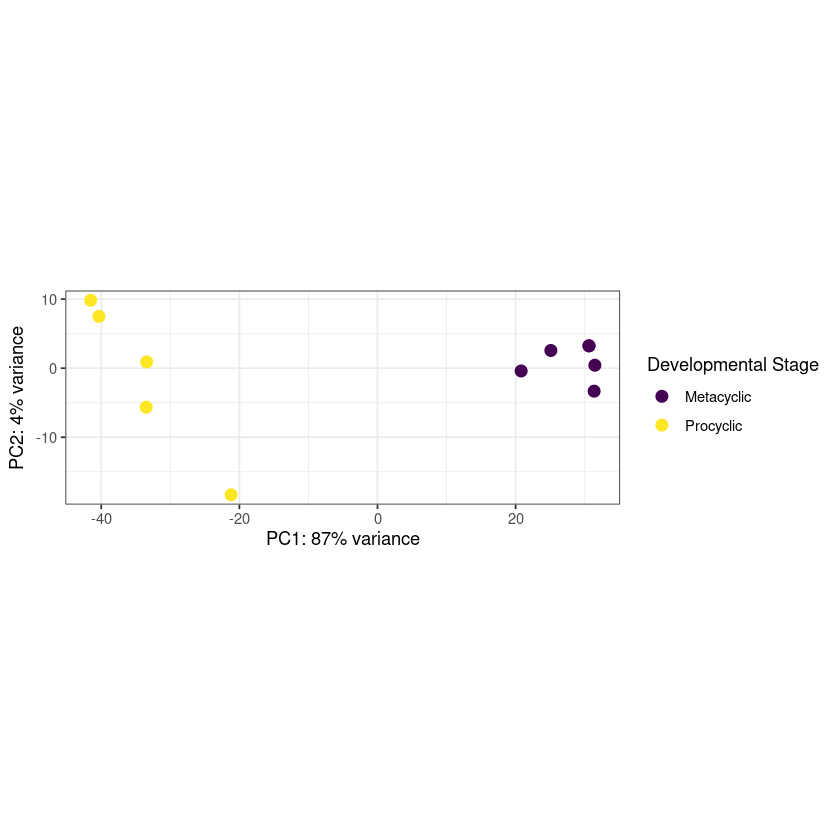

In [33]:
# 'Metacyclic_promastigote_Ficoll_isolation''Metacyclic_promastigote_PNA_isolation''Procyclic_promastigote'


pcaData<-plotPCA(vsd, intgroup=c( "class"), returnData=TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
pcaD<-ggplot(pcaData, aes(PC1, PC2, color=class,linetype=class)) +
  geom_point(size=3)  +
  guides(col=guide_legend("Developmental Stage"))+
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) + 
  scale_colour_viridis_d(option = "D",labels=c("Metacyclic_promastigote" = "Metacyclic",
                                              "Procyclic_promastigote" = "Procyclic" 
                                              ))+
  coord_fixed()+
  theme_bw()
pcaD

In [34]:
ggsave("/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lmajor/analysis/05_DEG/plots/PCAdeseq.pdf",
       pcaD, device="pdf",dpi = 300,
       width = 14.85,
       height = 18,
       units = "cm")

ggsave("/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lmajor/analysis/05_DEG/plots/PCAdeseq.png",
       pcaD, device="png",dpi = 300,
       width = 14.85,
       height = 18,
       units = "cm")

ggsave("/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lmajor/analysis/05_DEG/plots/PCAdeseq.tiff",
       pcaD, device="tiff",dpi = 300,
       width = 14.85,
       height = 18,
       units = "cm")

In [35]:
normalized_counts <- assay(vsd)

In [36]:
ann<-samples
rownames(ann)<-ann$sample
ann$sample<-NULL


In [37]:
ann_colors = list(
  class = c(Metacyclic_promastigote="#440154",
            Procyclic_promastigote="#fde725"))

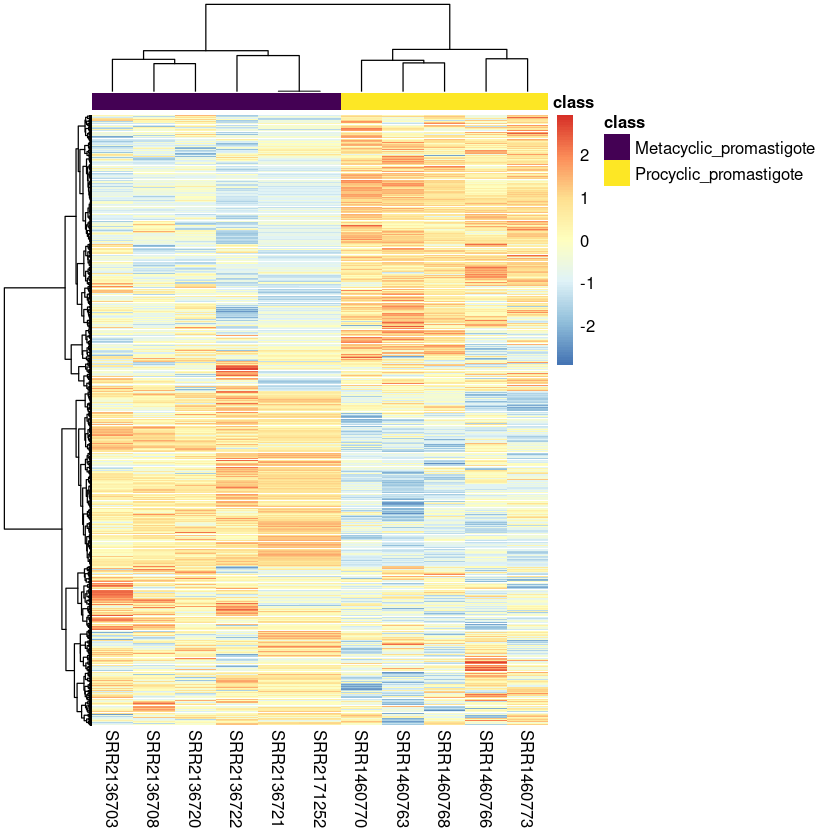

In [38]:
# Define a color palette
colors <- colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(100)

# Generate the heatmap with clustering
distSamples<-pheatmap(normalized_counts, 
         scale = "row", 
         clustering_distance_rows = "euclidean", 
         clustering_distance_cols = "euclidean", 
         clustering_method = "ward.D2", 
         annotation_col = ann,
         annotation_colors=ann_colors,
         color = colors, 
         show_rownames = FALSE, 
         show_colnames = TRUE)


In [39]:
save_pheatmap <- function(x, filename, width=10, height=10, res=300) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   png(filename,width = width, height=height,res = res,units = "in")
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

save_pheatmap_pdf <- function(x, filename, width=10, height=10) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename,width = width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

save_pheatmap_tiff <- function(x, filename, width=10, height=10) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   tiff(filename,width = width, height=height,res = 300,units = "in")
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

In [40]:
save_pheatmap(distSamples, 
              filename="/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lmajor/analysis/05_DEG/plots/clustering_heatmap.png")
save_pheatmap_pdf(distSamples, 
                  filename="//media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lmajor/analysis/05_DEG/plots/clustering_heatmap.pdf")
save_pheatmap_tiff(distSamples, 
                   filename="/media/eduardo/D1/ncRNAs_Leishmania_spp/RNAseq/Lmajor/analysis/05_DEG/plots/clustering_heatmap.tiff")

pdf 
  2

pdf 
  2

pdf 
  2